# Copyright : fast.ai - Jeremy Howard & Sylvain Gugger - 2020 (GPLv3)

Cellules de code et plan du notebook adaptées du livre :

[Deep Learning for Coders with fastai & PyTorch](https://github.com/fastai/fastbook) de Jeremy Howard et Sylvain Gugger.

The code in the original notebooks (and thus the code in this notebook) is covered by the GPL v3 license; see the [LICENSE file](https://github.com/fastai/fastbook/blob/master/LICENSE) for details.

## Entrainer votre premier modèle : chat ou chien ?

In [2]:
from fastai2.vision.all import *

path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.156855,0.026128,0.010149,00:19


epoch,train_loss,valid_loss,error_rate,time
0,0.081594,0.027361,0.007442,00:25


## Tester le modèle entrainé

In [5]:
import ipywidgets as widgets

uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [6]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 0.999928


In [ ]:
img

## Autre exemple : segmentation d'image pour voiture autonome

In [8]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.190431,2.118621,00:04


epoch,train_loss,valid_loss,time
0,1.709820,1.405468,00:01
1,1.508329,1.409143,00:01
2,1.398355,1.045004,00:01
3,1.265953,0.895123,00:01
4,1.142009,0.798733,00:01
5,1.037802,0.742594,00:01
6,0.953525,0.729369,00:01
7,0.885707,0.720241,00:01


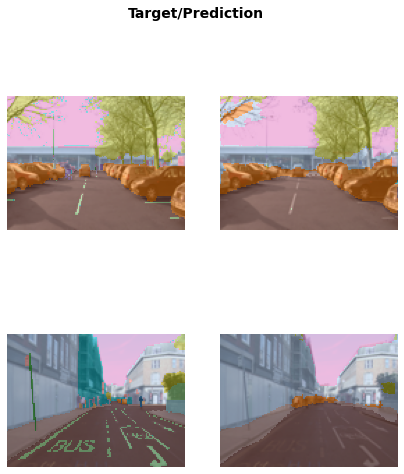

In [9]:
learn.show_results(max_n=6, figsize=(7,8))

## Langage naturel (NLP) : Analyse de sentiment sur les critiques de films

In [ ]:
from fastai2.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

Si vous obtenez une "erreur CUDA out of memory" après avoir lancé cette cellule, cliquez sur le menu Kernel, puis redémarrez. Au lieu d'exécuter la cellule ci-dessus, copiez et collez le code suivant dans cette cellule:

```
from fastai2.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=32)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)
```

Cela réduit la taille de batch à 32 (nous expliquerons cela plus tard). Si vous continuez à obtenir la même erreur, changez 32 par 16.

In [ ]:
learn.predict("I really liked that movie!")

## Données tabulaires (structurées) : Prédiction du salaire

In [ ]:
from fastai2.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(3)

## Recommandations de films à des utilisateurs

In [ ]:
from fastai2.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

In [ ]:
learn.show_results()